In [ ]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import cv2
import matplotlib.cm as cm



In [2]:
# Define the paths to your train and test datasets
train_dataset_path = r"..\DATASETS\Covid19-dataset\train"
test_dataset_path = r"..\DATASETS\Covid19-dataset\test"

# Load the training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dataset_path,
    image_size=(224, 224),  # Resize images to a fixed size
    batch_size=32,          # Adjust batch size as needed
    label_mode='int',       # 'int' for integer labels or 'categorical' for one-hot encoding
    seed=123                # Ensure repeatability
)

# Load the testing dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dataset_path,
    image_size=(224, 224),  # Resize images to the same size as the training set
    batch_size=32,
    label_mode='int',
    seed=123
)


Found 251 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


In [3]:
# Store the original class names from the train dataset
original_class_names = train_dataset.class_names
num_classes = len(original_class_names)

print("Original class names:", original_class_names)
print("Number of classes: ", num_classes)



Original class names: ['Covid', 'Normal', 'Viral Pneumonia']
Number of classes:  3


In [4]:
# size of each class for train and test
# Initialize dictionaries to store class counts for training and testing sets
train_class_counts = {class_name: 0 for class_name in original_class_names}
test_class_counts = {class_name: 0 for class_name in original_class_names}

# Count occurrences of each class in the training dataset
for images, labels in train_dataset:
    for label in labels:
        train_class_counts[original_class_names[label]] += 1

# Count occurrences of each class in the testing dataset
for images, labels in test_dataset:
    for label in labels:
        test_class_counts[original_class_names[label]] += 1

# Print the class sizes for the training dataset
print("Class sizes in the training dataset:")
for class_name, count in train_class_counts.items():
    print(f"{class_name}: {count}")

# Print the class sizes for the testing dataset
print("\nClass sizes in the testing dataset:")
for class_name, count in test_class_counts.items():
    print(f"{class_name}: {count}")


Class sizes in the training dataset:
Covid: 111
Normal: 70
Viral Pneumonia: 70

Class sizes in the testing dataset:
Covid: 26
Normal: 20
Viral Pneumonia: 20


In [5]:
# The shape of images is typically (batch_size, height, width, channels), so images.shape[0] gives the batch size.
for images, labels in train_dataset.take(1):
    batch_size = images.shape[0]
    print("Batch size:", batch_size)


Batch size: 32


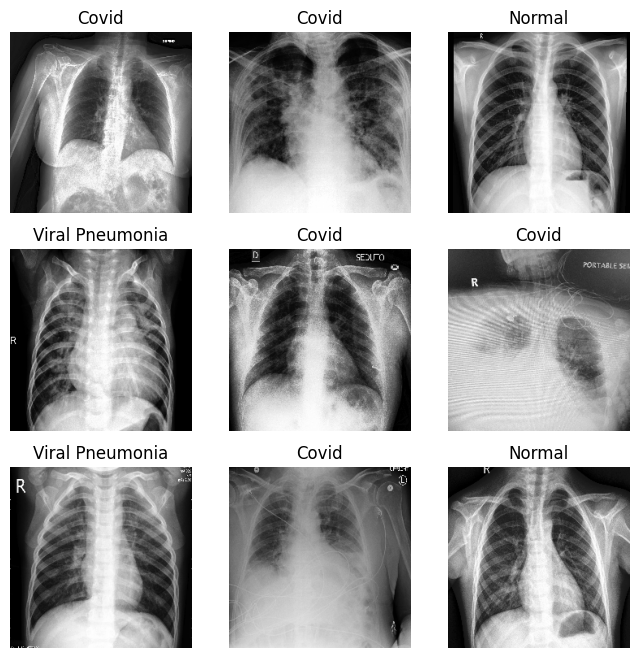

In [6]:
# Multi-class dataset visualization
plt.figure(figsize=(8, 8))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(original_class_names[labels[i]])
    plt.axis("off")

In [7]:
from tensorflow.keras.layers import Rescaling

# Normalize images
normalization_layer = Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))


In [8]:
model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),  # Pooling layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),  # Pooling layer
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),  # Pooling layer
    layers.Flatten(),  # Flatten the 3D output to 1D for fully connected layers
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Multi-class classification output
])

# Step 6: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 16)        4624      
                                                                 
________________________________________________________

In [10]:
# Step 7: Train the model
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=15  # Adjust the number of epochs as needed
)


Epoch 1/15
8/8 [==============================] - 6s 166ms/step - loss: 1.0714 - accuracy: 0.4582 - val_loss: 0.9096 - val_accuracy: 0.6515
Epoch 2/15
8/8 [==============================] - 6s 166ms/step - loss: 1.0714 - accuracy: 0.4582 - val_loss: 0.9096 - val_accuracy: 0.6515
Epoch 2/15
8/8 [==============================] - 1s 64ms/step - loss: 0.6366 - accuracy: 0.7610 - val_loss: 0.5659 - val_accuracy: 0.8030
Epoch 3/15
8/8 [==============================] - 1s 64ms/step - loss: 0.6366 - accuracy: 0.7610 - val_loss: 0.5659 - val_accuracy: 0.8030
Epoch 3/15
8/8 [==============================] - 1s 66ms/step - loss: 0.3368 - accuracy: 0.8725 - val_loss: 0.4251 - val_accuracy: 0.8333
Epoch 4/15
8/8 [==============================] - 1s 66ms/step - loss: 0.3368 - accuracy: 0.8725 - val_loss: 0.4251 - val_accuracy: 0.8333
Epoch 4/15
8/8 [==============================] - 1s 66ms/step - loss: 0.2277 - accuracy: 0.9243 - val_loss: 0.3966 - val_accuracy: 0.8485
Epoch 5/15
8/8 [=========

3/3 [==============================] - 0s 79ms/step
Classification Report:
                 precision    recall  f1-score   support

          Covid       0.96      0.92      0.94        26
         Normal       0.76      0.95      0.84        20
Viral Pneumonia       0.94      0.75      0.83        20

       accuracy                           0.88        66
      macro avg       0.89      0.87      0.87        66
   weighted avg       0.89      0.88      0.88        66

Classification Report:
                 precision    recall  f1-score   support

          Covid       0.96      0.92      0.94        26
         Normal       0.76      0.95      0.84        20
Viral Pneumonia       0.94      0.75      0.83        20

       accuracy                           0.88        66
      macro avg       0.89      0.87      0.87        66
   weighted avg       0.89      0.88      0.88        66



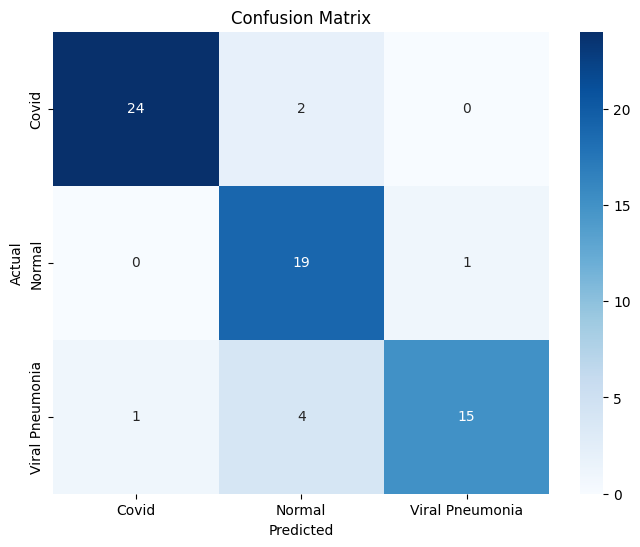


Prediction counts for each class:
Covid: 24/26 correct (92.3% accuracy)
Normal: 19/20 correct (95.0% accuracy)
Viral Pneumonia: 15/20 correct (75.0% accuracy)


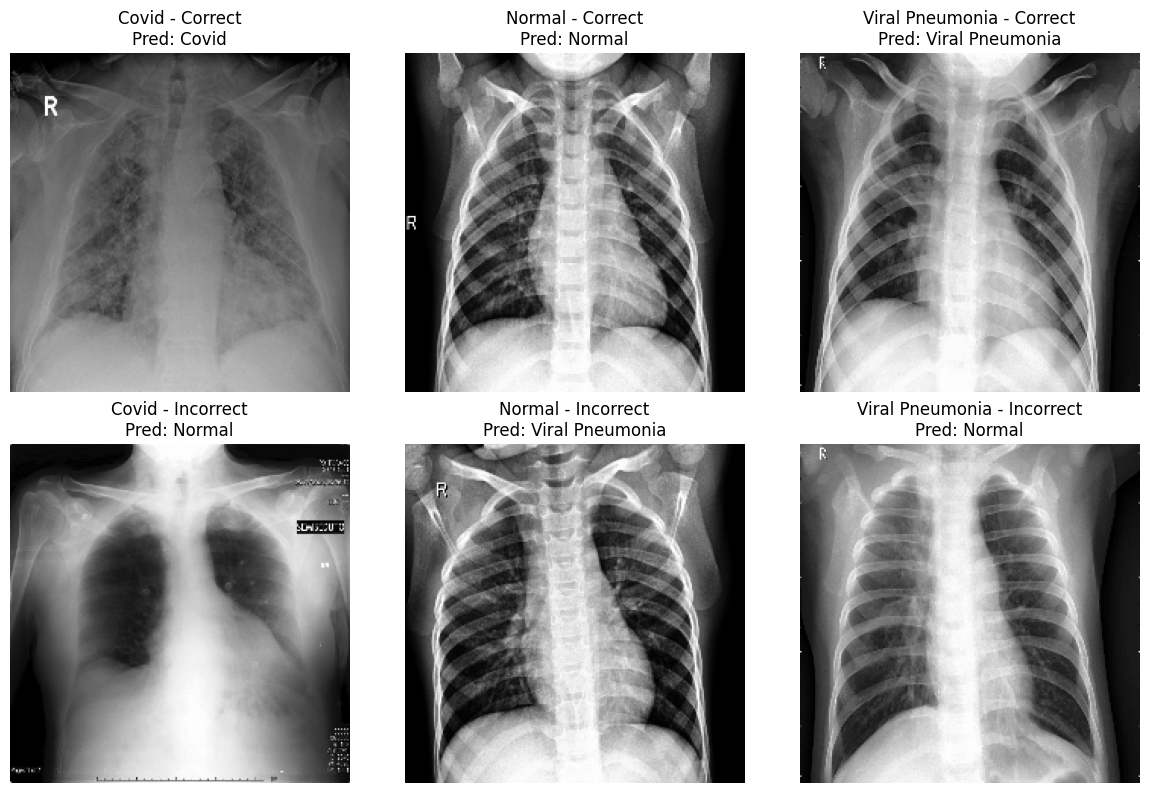

Selected indices for Grad-CAM: {'Covid_correct': 9, 'Covid_incorrect': 37, 'Normal_correct': 6, 'Normal_incorrect': 59, 'Viral Pneumonia_correct': 13, 'Viral Pneumonia_incorrect': 18}


In [11]:
import random
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming original_class_names is defined, e.g.,
# original_class_names = ['Class1', 'Class2', 'Class3', 'Class4']

# Step 1: Gather all images and labels from the test set
all_images = []
all_true_labels = []
for images, labels in test_dataset:
    all_images.extend(images)
    all_true_labels.extend(labels.numpy())

# Convert the lists to numpy arrays for easier handling
all_images = np.array(all_images)
all_true_labels = np.array(all_true_labels)

# Step 2: Predict on the entire test set
predictions = model.predict(all_images)
predicted_labels = np.argmax(predictions, axis=1)

# Step 3: Print classification report
print("Classification Report:")
print(classification_report(all_true_labels, predicted_labels, target_names=original_class_names))

# Step 4: Create and display confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(all_true_labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=original_class_names, 
            yticklabels=original_class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Initialize lists to store indices of each type of example for each class
class_indices = {class_name: {'correct': [], 'incorrect': []} for class_name in original_class_names}

# Step 5: Identify correctly and incorrectly classified examples for each class
for i in range(len(predicted_labels)):
    true_class = original_class_names[all_true_labels[i]]
    predicted_class = original_class_names[predicted_labels[i]]
    
    if predicted_labels[i] == all_true_labels[i]:
        class_indices[true_class]['correct'].append(i)
    else:
        class_indices[true_class]['incorrect'].append(i)

# Print the count of correct and incorrect predictions for each class
print("\nPrediction counts for each class:")
for class_name in original_class_names:
    correct_count = len(class_indices[class_name]['correct'])
    incorrect_count = len(class_indices[class_name]['incorrect'])
    total = correct_count + incorrect_count
    accuracy = correct_count / total * 100 if total > 0 else 0
    print(f"{class_name}: {correct_count}/{total} correct ({accuracy:.1f}% accuracy)")

# Randomly choose examples from each class (both correct and incorrect if available)
selected_indices = {}
for class_name in original_class_names:
    correct_indices = class_indices[class_name]['correct']
    incorrect_indices = class_indices[class_name]['incorrect']
    
    selected_indices[f"{class_name}_correct"] = random.choice(correct_indices) if correct_indices else None
    selected_indices[f"{class_name}_incorrect"] = random.choice(incorrect_indices) if incorrect_indices else None

# Step 6: Plot examples of correct and incorrect predictions
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

plot_idx = 0
for class_name in original_class_names:
    # Plot correct prediction
    correct_idx = selected_indices[f"{class_name}_correct"]
    if correct_idx is not None and plot_idx < 6:
        axes[plot_idx].imshow(all_images[correct_idx])
        axes[plot_idx].set_title(f"{class_name} - Correct\nPred: {original_class_names[predicted_labels[correct_idx]]}")
        axes[plot_idx].axis("off")
        plot_idx += 1

# Plot some incorrect predictions in remaining slots
for class_name in original_class_names:
    incorrect_idx = selected_indices[f"{class_name}_incorrect"]
    if incorrect_idx is not None and plot_idx < 6:
        axes[plot_idx].imshow(all_images[incorrect_idx])
        axes[plot_idx].set_title(f"{class_name} - Incorrect\nPred: {original_class_names[predicted_labels[incorrect_idx]]}")
        axes[plot_idx].axis("off")
        plot_idx += 1

# Hide unused subplots
for i in range(plot_idx, 6):
    axes[i].axis("off")

plt.tight_layout()
plt.show()

print("Selected indices for Grad-CAM:", selected_indices)

In [12]:
# Find the last layer name in the model
for layer in reversed(model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer = layer.name
        break

print(f"Last convolutional layer name: {last_conv_layer}")

Last convolutional layer name: conv2d_2


In [13]:
# Check if the last layer is a wrapper or directly usable
if hasattr(model.layers[-1], 'output'):
    last_dense_layer = model.layers[-1].name
else:
    last_dense_layer = model.layers[-2].name

print("Last dense layer name:", last_dense_layer)


Last dense layer name: dense_1


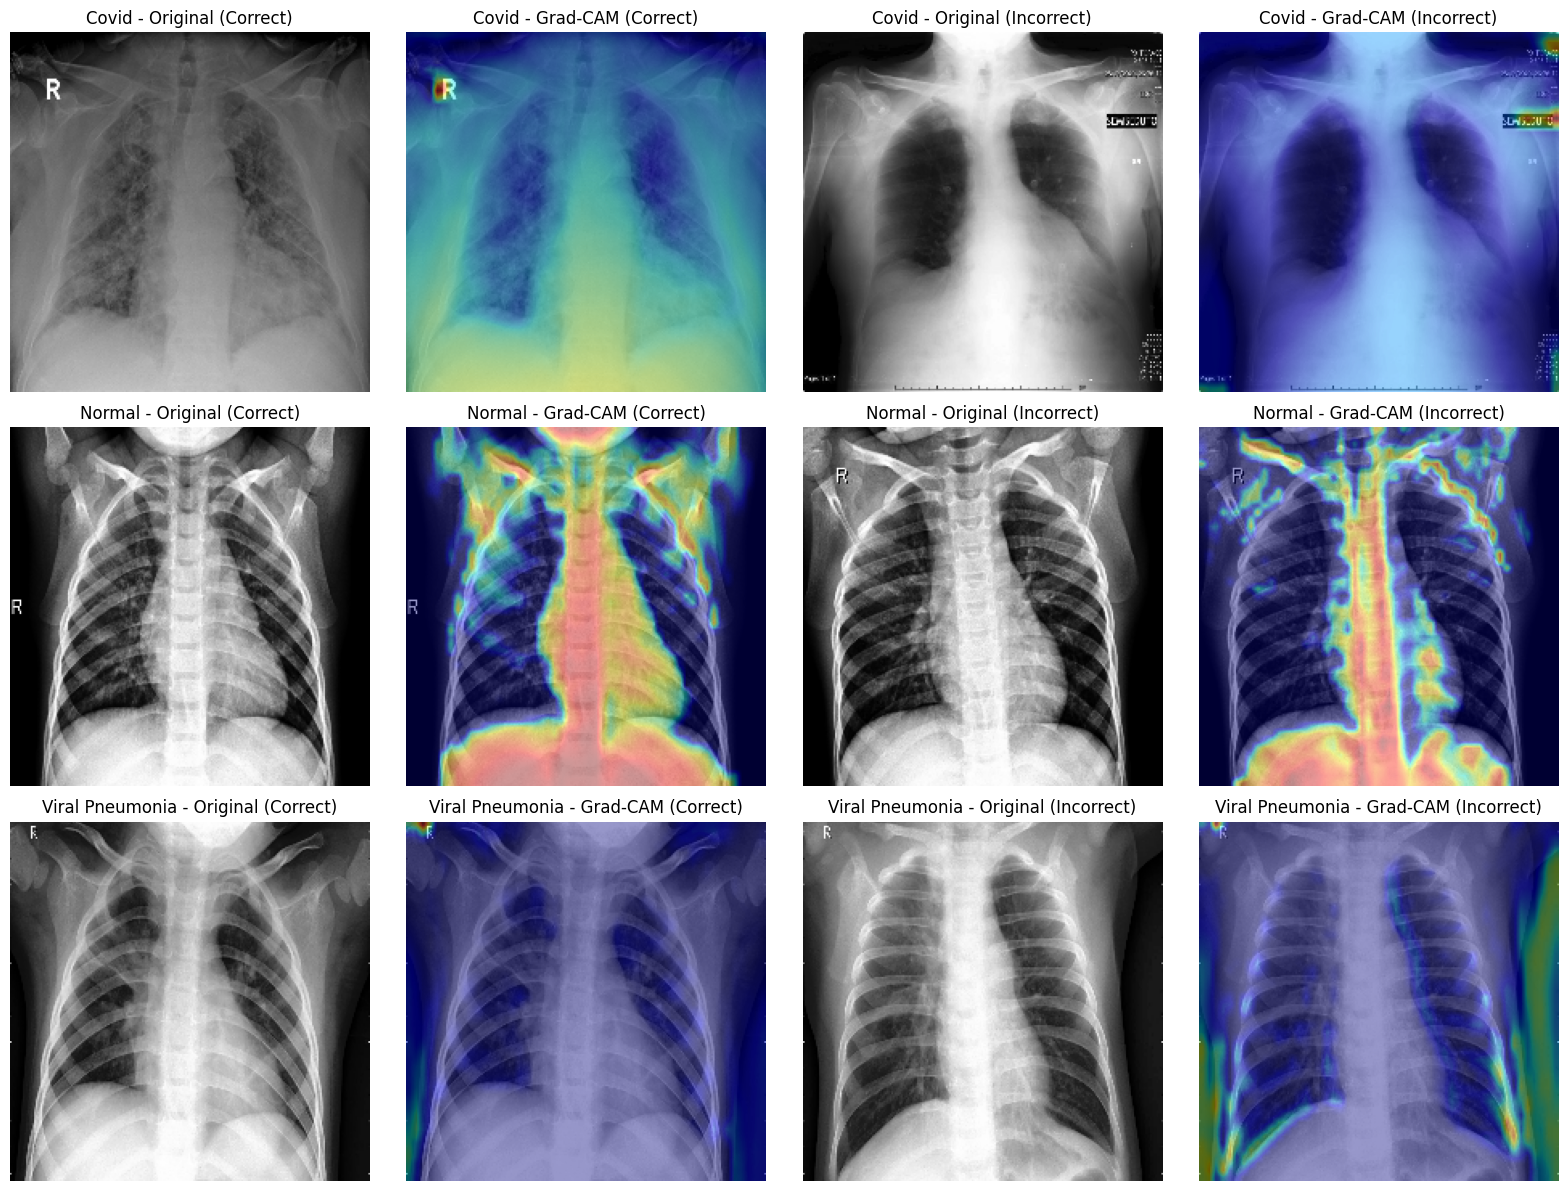

In [14]:
import tensorflow as tf
import cv2

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    """
    Custom Grad-CAM implementation for multi-class classification
    """
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (predicted class)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Generate Grad-CAM heatmaps for selected examples
gradcam_heatmaps = {}

for case_name, idx in selected_indices.items():
    if idx is not None:
        img_array = np.expand_dims(all_images[idx], axis=0)
        
        # Use the true class for Grad-CAM generation
        true_class_idx = all_true_labels[idx]
        
        # Generate raw heatmap
        heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer, pred_index=true_class_idx)
        
        # Resize heatmap to match original image size
        heatmap_resized = cv2.resize(heatmap, (224, 224))
        
        gradcam_heatmaps[case_name] = heatmap_resized

# Plot Grad-CAM visualizations for each class
fig, axes = plt.subplots(len(original_class_names), 4, figsize=(16, 4*len(original_class_names)))
if len(original_class_names) == 1:
    axes = axes.reshape(1, -1)

for class_idx, class_name in enumerate(original_class_names):
    # Correct prediction
    correct_case = f"{class_name}_correct"
    if correct_case in gradcam_heatmaps and selected_indices[correct_case] is not None:
        idx = selected_indices[correct_case]
        original_img = all_images[idx]
        heatmap = gradcam_heatmaps[correct_case]
        
        # Normalize image for display
        img_normalized = ((original_img - original_img.min()) / (original_img.max() - original_img.min()) * 255).astype(np.uint8)
        
        # Original image
        axes[class_idx, 0].imshow(img_normalized, cmap='gray')
        axes[class_idx, 0].set_title(f"{class_name} - Original (Correct)")
        axes[class_idx, 0].axis("off")
        
        # Grad-CAM overlay
        axes[class_idx, 1].imshow(img_normalized, cmap='gray')
        axes[class_idx, 1].imshow(heatmap, cmap='jet', alpha=0.4)
        axes[class_idx, 1].set_title(f"{class_name} - Grad-CAM (Correct)")
        axes[class_idx, 1].axis("off")
    else:
        axes[class_idx, 0].axis("off")
        axes[class_idx, 1].axis("off")
    
    # Incorrect prediction
    incorrect_case = f"{class_name}_incorrect"
    if incorrect_case in gradcam_heatmaps and selected_indices[incorrect_case] is not None:
        idx = selected_indices[incorrect_case]
        original_img = all_images[idx]
        heatmap = gradcam_heatmaps[incorrect_case]
        
        # Normalize image for display
        img_normalized = ((original_img - original_img.min()) / (original_img.max() - original_img.min()) * 255).astype(np.uint8)
        
        # Original image
        axes[class_idx, 2].imshow(img_normalized, cmap='gray')
        axes[class_idx, 2].set_title(f"{class_name} - Original (Incorrect)")
        axes[class_idx, 2].axis("off")
        
        # Grad-CAM overlay
        axes[class_idx, 3].imshow(img_normalized, cmap='gray')
        axes[class_idx, 3].imshow(heatmap, cmap='jet', alpha=0.4)
        axes[class_idx, 3].set_title(f"{class_name} - Grad-CAM (Incorrect)")
        axes[class_idx, 3].axis("off")
    else:
        axes[class_idx, 2].axis("off")
        axes[class_idx, 3].axis("off")

plt.tight_layout()
plt.show()